## imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

## over-sampled data

In [2]:
# read data

df_o = pd.read_csv('over-sample.csv')

In [3]:
# choose train and test variable

X = df_o.drop('Outcome', axis=1)
y = df_o['Outcome']

In [4]:
# scale data

scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)
X = Xstd

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [5]:
# accuracy of over-sampled data with 25% test size

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred= model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, pred)

0.7545454545454545

### Linear SVM

In [6]:
# basic model (to put best params in after grid search)

from sklearn.svm import SVC
svm_linear = SVC(kernel="linear",C=0.5)
svm_linear.fit(X_train,y_train)
print("Accuracy of svm(linear): %",svm_linear.score(X_test,y_test)*100)
print(svm_linear.get_params())

Accuracy of svm(linear): % 69.0909090909091
{'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


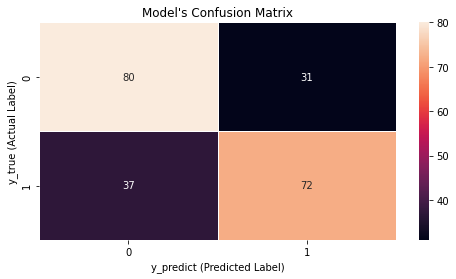

True negative =  80
False positive =  31
False negative =  37
True positive =  72
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       111
           1       0.70      0.66      0.68       109

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [7]:
# linear svm performance analysis (before grid search)

# confusion matrix
y_pred = svm_linear.predict(X_test)
y_true = y_test

# 0 value is negative, 1 value is positive
cmatrix_linear = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_linear,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_linear[0][0])
print('False positive = ', cmatrix_linear[0][1])
print('False negative = ', cmatrix_linear[1][0])
print('True positive = ', cmatrix_linear[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### grid search

In [8]:
# grid search

from sklearn.svm import SVC
param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 5, 10]}
svm_linear = SVC(kernel="linear")
svm_gscv0 = GridSearchCV(svm_linear,param_grid=param_grid)
svm_gscv0.fit(X_train,y_train)

print("Tuned best parameters for kernel linear svm: ",svm_gscv0.best_params_ ) 
print("Best score: {}".format(svm_gscv0.best_score_))

Tuned best parameters for kernel linear svm:  {'C': 0.001}
Best score: 0.7447721489706222


In [9]:
# basic model (with best params)

from sklearn.svm import SVC
svm_linear = SVC(kernel="linear",C=0.001)
svm_linear.fit(X_train,y_train)
print("Accuracy of svm(linear): %",svm_linear.score(X_test,y_test)*100)
print(svm_linear.get_params())

Accuracy of svm(linear): % 70.9090909090909
{'C': 0.001, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


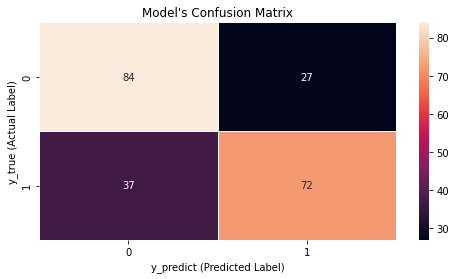

True negative =  84
False positive =  27
False negative =  37
True positive =  72
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       111
           1       0.73      0.66      0.69       109

    accuracy                           0.71       220
   macro avg       0.71      0.71      0.71       220
weighted avg       0.71      0.71      0.71       220



In [10]:
# linear svm performance analysis (after gid search)

# confusion matrix
y_pred = svm_linear.predict(X_test)
y_true = y_test

# 0 value is negative, 1 value is positive
cmatrix_linear = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_linear,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_linear[0][0])
print('False positive = ', cmatrix_linear[0][1])
print('False negative = ', cmatrix_linear[1][0])
print('True positive = ', cmatrix_linear[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

In [12]:
param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 5, 10]}
svm_linear = SVC(kernel="linear")
svm_gscv0 = GridSearchCV(svm_linear,param_grid=param_grid)
svm_gscv0.fit(X_train,y_train)

print("Tuned best parameters for kernel linear svm: ",svm_gscv0.best_params_ ) 
print("Best score: {}".format(svm_gscv0.best_score_))

Tuned best parameters for kernel linear svm:  {'C': 0.001}
Best score: 0.7447721489706222


#### cross validation

In [12]:
# cross validation

lin_svc = SVC(kernel='linear',C=0.001)
lin_svc.fit(X,y)
lin_svc_result = cross_validate(lin_svc,X, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(lin_svc_result['test_score']))
print("Cv:5, Train Score: {}".format(lin_svc_result['train_score']))


accuracy = cross_val_score(lin_svc,X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(),accuracy.std() * 2))

f1 = cross_val_score(lin_svc,X,y,cv=5,scoring='f1')
print('F1 Score : ',f1)

mse = cross_val_score(lin_svc,X,y,cv=5,scoring='neg_mean_squared_error')
print('Negative Mean Squared Error: ', mse)
print("Cv = 5, recall = ",cross_val_score(lin_svc, X, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(lin_svc, X, y, scoring='precision'))

Cv:5, Test Score: [0.72727273 0.70454545 0.75       0.71428571 0.77142857]
Cv:5, Train Score: [0.71937322 0.73789174 0.72792023 0.7254623  0.72830725]
Accuracy: 0.73 (+/- 0.05)
F1 Score :  [0.7037037  0.69411765 0.73170732 0.6875     0.75609756]
Negative Mean Squared Error:  [-0.27272727 -0.29545455 -0.25       -0.28571429 -0.22857143]
Cv = 5, recall =  [0.64772727 0.67045455 0.68181818 0.63218391 0.70454545]
Cv = 5, precision =  [0.77027027 0.7195122  0.78947368 0.75342466 0.81578947]


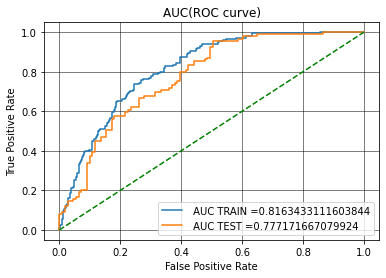

In [13]:
# roc curve of train and test accuracy

from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc

np.random.seed(0)

model = SGDClassifier(loss='hinge', alpha=0.0001, class_weight='balanced')
model.fit(X_train, y_train)

y_train_pred = model.decision_function(X_train)    
y_test_pred = model.decision_function(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
#when AUC is 0.5-1, high chance that classifier is able to distinguish positive class valuces from negative class (detect more true positive and true negative)